# Analyzing  Dissatisfaction Factor in Employee Exit

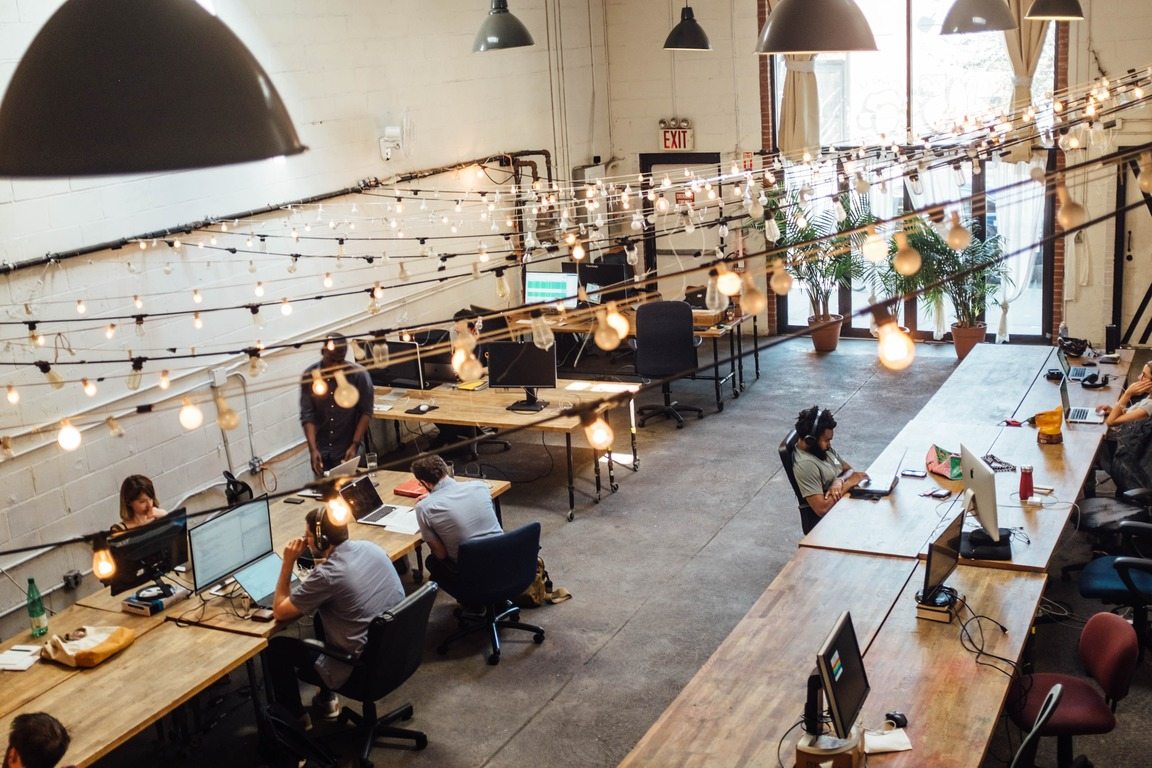

## Introduction
In this project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. The corresponding dataset for the DETE institute can be found [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey), the one for the TAFE institute is not anymore available on [data.gov.au](https://data.gov.au).

The aim of this project is to find the answers to the following questions:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

To answer these questions, we're going to combine the results for both surveys. However, although both used the same survey template, one of them customized some of the answers. In addition, data dictionaries weren't provided with the datasets, so for the purposes of this project, we'll use our general knowledge to define the columns.
### Summary of Results
The main findings from this project are that the employees who worked longer in the institute / the older employees are more likely to resign because of dissatisfaction than those who worked for a shorter period / the younger employees and that the percentage of dissatisfied employees from the DETE institute is twice higher than from the TAFE. 

## Data Downloading and Initial Data Exploration
We'll start by importing the Python libraries, reading the datasets into pandas, and exploring them:

In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')
pd.set_option('max_columns', max(dete_survey.shape[1], tafe_survey.shape[1]))

### DETE Dataset Exploration

In [299]:
print(f'\033[1mNumber of rows:\033[0m {dete_survey.shape[0]}\n'
      f'\033[1mNumber of columns:\033[0m {dete_survey.shape[1]}\n'
      f'\033[1m\nColumn names:\033[0m\n'
      f'{list(dete_survey.columns)}')

Number of rows: 822
Number of columns: 56

Column names:
['ID', 'SeparationType', 'Cease Date', 'DETE Start Date', 'Role Start Date', 'Position', 'Classification', 'Region', 'Business Unit', 'Employment Status', 'Career move to public sector', 'Career move to private sector', 'Interpersonal conflicts', 'Job dissatisfaction', 'Dissatisfaction with the department', 'Physical work environment', 'Lack of recognition', 'Lack of job security', 'Work location', 'Employment conditions', 'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health', 'Traumatic incident', 'Work life balance', 'Workload', 'None of the above', 'Professional Development', 'Opportunities for promotion', 'Staff morale', 'Workplace issue', 'Physical environment', 'Worklife balance', 'Stress and pressure support', 'Performance of supervisor', 'Peer support', 'Initiative', 'Skills', 'Coach', 'Career Aspirations', 'Feedback', 'Further PD', 'Communication', 'My say', 'Information', 'Kept informed', 'Wellness programs', '

The column names are intuitively understandable. The column naming style is not consistent: pascal case, title case, using symbols.

In [300]:
dete_survey.dtypes

ID                                      int64
SeparationType                         object
Cease Date                             object
DETE Start Date                        object
Role Start Date                        object
Position                               object
Classification                         object
Region                                 object
Business Unit                          object
Employment Status                      object
Career move to public sector             bool
Career move to private sector            bool
Interpersonal conflicts                  bool
Job dissatisfaction                      bool
Dissatisfaction with the department      bool
Physical work environment                bool
Lack of recognition                      bool
Lack of job security                     bool
Work location                            bool
Employment conditions                    bool
Maternity/family                         bool
Relocation                        

The most common data type in the dataset is string (object). The column `ID` has integer data type, all the others – boolean.

In [301]:
dete_survey.head(5)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


We can make some new observations:

- `Cease Date` is represented in at least 2 formats: mm/YYYY and YYYY.
- `DETE Start Date` and `Role Start Date` can have the value "Not Stated", which practically means a missing value.
- The columns from `Professional Development` till `Health & Safety` are presented in denotations, and we don't have any legend to decipher them. In addition, these columns don't look valuable for answering our questions, so most probably, we'll have to delete them.

Let's take a closer look at some columns, especially focusing on missing values:

In [302]:
print(list(dete_survey['Region'].unique()))

['Central Office', 'Central Queensland', 'South East', 'Darling Downs South West', 'North Coast', 'North Queensland', 'Not Stated', 'Far North Queensland', 'Metropolitan']


We see that for the `Region` column, missing values are represented by "Not Stated".

In [303]:
print(f'\033[1mThe values of \'Employment Status\', %:\033[0m\n\n'
      f"{round(dete_survey['Employment Status'].value_counts(dropna=False)*100/len(dete_survey)).astype(int)}")

The values of 'Employment Status', %:

Permanent Full-time    53
Permanent Part-time    37
Temporary Full-time     5
Temporary Part-time     3
Casual                  1
NaN                     1
Name: Employment Status, dtype: int32


The most common value of `Employment Status` is "Permanent Full-time", followed by "Permanent Part-time", altogether amounting to 90% of all the values.

In [308]:
print(f'\033[1mMissing values by column, %:\033[0m\n\n'
      f"{round((dete_survey.isnull().sum()*100/len(dete_survey))).convert_dtypes()}")

Missing values by column, %:

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 1
Classification                          45
Region                                   0
Business Unit                           85
Employment Status                        1
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel            

About half of the columns contain missing values, up to nearly 100% in the last 5 columns. Apart from those 5, the other columns with a high percentage of missing values are `Business Unit` (85%), `Classification` (45%), `Opportunities for promotion` (11%), and `Career Aspirations` (9%).
### TAFE Dataset Exploration
Now, we'll take a look at the second dataset:

In [153]:
print(f'\033[1mNumber of rows:\033[0m {tafe_survey.shape[0]}\n'
      f'\033[1mNumber of columns:\033[0m {tafe_survey.shape[1]}\n'
      f'\033[1m\nColumn names:\033[0m\n'
      f'{list(tafe_survey.columns)}')

Number of rows: 702
Number of columns: 72

Column names:
['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR', 'Reason for ceasing employment', 'Contributing Factors. Career Move - Public Sector ', 'Contributing Factors. Career Move - Private Sector ', 'Contributing Factors. Career Move - Self-employment', 'Contributing Factors. Ill Health', 'Contributing Factors. Maternity/Family', 'Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction', 'Contributing Factors. Interpersonal Conflict', 'Contributing Factors. Study', 'Contributing Factors. Travel', 'Contributing Factors. Other', 'Contributing Factors. NONE', 'Main Factor. Which of these was the main factor for leaving?', 'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction', 'InstituteViews. Topic:2. I was given access to skills training to help me do my job better', 'InstituteViews. Topic:3. I was given adequate opportunities for personal development', 'InstituteViews. 

The column names are too wordy and hardly comprehensible. The column naming style is rather mixed: pascal case, upper case, title case, long questions, subheadings, punctuation marks. Many of the column names representing the survey questions are repetitive or too detailed.

Let's check the data types of the columns:

In [154]:
tafe_survey.dtypes.value_counts()

object     70
float64     2
dtype: int64

The predominant data type in the dataset is string (object). 

In [155]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

Some preliminary observations at this stage:

- `Record ID` is represented by quite big numbers.
- `CESSATION YEAR` is float.
- At many questions of the survey was replied "yes", or the question was omitted.

Let's take a  closer look at some of the columns:

In [156]:
list(tafe_survey['WorkArea'].unique())

['Non-Delivery (corporate)', 'Delivery (teaching)']

There are only 2 categories in `WorkArea`.

In [157]:
print(f'\033[1mReasons for ceasing employment, %:\033[0m\n\n'
      f"{round(tafe_survey['Reason for ceasing employment'].value_counts(dropna=False)*100/len(tafe_survey)).astype(int)}")

Reasons for ceasing employment, %:

Resignation                 48
Contract Expired            18
Retrenchment/ Redundancy    15
Retirement                  12
Transfer                     4
Termination                  3
NaN                          0
Name: Reason for ceasing employment, dtype: int32


The most common reason for leaving the institute is resignation.

In [158]:
list(tafe_survey['Contributing Factors. Career Move - Public Sector '].unique())

[nan, '-', 'Career Move - Public Sector']

In [159]:
list(tafe_survey['Contributing Factors. Career Move - Self-employment'].unique())

[nan, '-', 'Career Move - Self-employment']

The group of columns with the names starting with  `Contributing Factors...` practically shows if the factor was the reason for leaving or not.

In [160]:
print(f'\033[1mThe values of the \'Main factor...\' column, %:\033[0m\n\n'
      f"{round(tafe_survey['Main Factor. Which of these was the main factor for leaving?'].value_counts(dropna=False)*100/len(tafe_survey)).astype(int)}")

The values of the 'Main factor...' column, %:

NaN                                         84
Dissatisfaction with %[Institute]Q25LBL%     3
Job Dissatisfaction                          3
Other                                        3
Career Move - Private Sector                 2
Interpersonal Conflict                       1
Career Move - Public Sector                  1
Maternity/Family                             1
Career Move - Self-employment                1
Ill Health                                   0
Study                                        0
Travel                                       0
Name: Main Factor. Which of these was the main factor for leaving?, dtype: int32


The column `Main Factor. Which of these was the main factor for leaving?` was supposed to be a generalization of the above-mentioned group of columns with contributing factors, but in reality, it has very few values. It seems that the respondents felt tired to reply the repetitive questions, or just found it redundant. Probably it would have been more efficient for the dataset, and more informative for the survey itself, to keep only this question in the survey, where people could directly choose the reason for leaving the institute.

In [161]:
list(tafe_survey['InstituteViews. Topic:3. I was given adequate opportunities for personal development'].unique())

['Agree',
 'Strongly Agree',
 'Neutral',
 nan,
 'Strongly Disagree',
 'Disagree',
 'Not Applicable']

In [162]:
list(tafe_survey['WorkUnitViews. Topic:30. Staff morale was positive within my work unit'].unique())

['Agree',
 'Strongly Agree',
 'Neutral',
 'Strongly Disagree',
 nan,
 'Disagree',
 'Not Applicable']

The columns above (and all the other columns representing the survey questions) show the same structure of possible answers for each question. We can also assume that those denotations without legend for the DETE dataset have exactly the same meanings:

In [163]:
list(dete_survey['Kept informed'].unique())

['N', 'A', 'D', 'SA', 'SD', 'M', nan]

Despite now we found out possible meanings, both those columns of the DETE dataset and the columns representing the survey questions in the TAFE dataset have to be dropped since they don't give any explicit value for our further analysis.

In [164]:
print(f'\033[1mEmployment type, %:\033[0m\n\n'
      f"{round(tafe_survey['Employment Type. Employment Type'].value_counts(dropna=False)*100/len(tafe_survey)).astype(int)}")

Employment type, %:

Permanent Full-time    34
Temporary Full-time    25
NaN                    15
Contract/casual        10
Permanent Part-time     8
Temporary Part-time     7
Name: Employment Type. Employment Type, dtype: int32


The most common employment types for the TAFE are "Permanent Full-time" and "Temporary Full-time".

In [165]:
pd.set_option('display.max_rows', None)
print(f'\033[1mMissing values by column, %:\033[0m\n\n'
      f"{round((tafe_survey.isnull().sum()*100/len(tafe_survey))).astype(int)}")

Missing values by column, %:

Record ID                                                                                                                                                         0
Institute                                                                                                                                                         0
WorkArea                                                                                                                                                          0
CESSATION YEAR                                                                                                                                                    1
Reason for ceasing employment                                                                                                                                     0
Contributing Factors. Career Move - Public Sector                                                                                                     

We can observe that the majority of columns contain a high percentage of missing values, with `Main Factor...` most of all. Judging by an obvious pattern in missing values for the `Contributing Factors...` columns (38% missing values in each), some people, most probably, ignored this group of columns and replied directly in `Main Factor...`, some other respondents did just the opposite, and the others ignored both `Contributing Factors...` and `Main Factor...`.
## Data Cleaning
### Transforming "Not Stated " in NaN 
As we noticed earlier, the DETE dataset contains "Not Stated" values that indicate missing values not represented as NaN. Let's re-read the dataset and fix this issue:

In [166]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

### Dropping  Unnecessary Columns
We have already identified the columns that we won't use in our analysis: the last 5 columns and the columns with denotations for the DETE dataset (from `Professional Development` to `Health & Safety` inclusive) and those representing the survey questions for the TAFE dataset. For the last one, we'll delete also the `Main Factor...` column, containing 84% of missing values. Hence, for the TAFE dataset, we'll delete all the columns from `Main Factor...` to `Workplace. Topic:Would you recommend the Institute as an employer to others?` inclusive.

First, we have to find the indices of these columns:

In [167]:
# Finding the column indices for DETE
print(dete_survey.columns.get_loc('Professional Development'))
print(dete_survey.columns.get_loc('Health & Safety'))

28
48


In [168]:
# Finding the column indices for TAFE
print(tafe_survey.columns.get_loc('Main Factor. Which of these was the main factor for leaving?'))
print(tafe_survey.columns.get_loc('Workplace. Topic:Would you recommend the Institute as an employer to others?'))

17
65


Now, we'll drop the columns between these indices inclusive from the corresponding datasets and also the last 5 columns of the DETE dataset:

In [169]:
# Dropping the unnecessary columns
dete_survey_updated = dete_survey.drop(list(dete_survey.columns[28:49])+list(dete_survey.columns[-5:]), axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

print(f'\033[1mDETE updated, number of columns:\033[0m {dete_survey_updated.shape[1]}\n'
      f'\033[1m\nColumn names:\033[0m\n'
      f'{list(dete_survey_updated.columns)}\n\n'
      f'\033[1mTAFE updated, number of columns:\033[0m {tafe_survey_updated.shape[1]}\n'
      f'\033[1m\nColumn names:\033[0m\n'
      f'{list(tafe_survey_updated.columns)}')

DETE updated, number of columns: 30

Column names:
['ID', 'SeparationType', 'Cease Date', 'DETE Start Date', 'Role Start Date', 'Position', 'Classification', 'Region', 'Business Unit', 'Employment Status', 'Career move to public sector', 'Career move to private sector', 'Interpersonal conflicts', 'Job dissatisfaction', 'Dissatisfaction with the department', 'Physical work environment', 'Lack of recognition', 'Lack of job security', 'Work location', 'Employment conditions', 'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health', 'Traumatic incident', 'Work life balance', 'Workload', 'None of the above', 'Gender', 'Age']

TAFE updated, number of columns: 23

Column names:
['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR', 'Reason for ceasing employment', 'Contributing Factors. Career Move - Public Sector ', 'Contributing Factors. Career Move - Private Sector ', 'Contributing Factors. Career Move - Self-employment', 'Contributing Factors. Ill Health', 'Contributing Factors. 

We significantly reduced the number of columns for both datasets leaving only the most relevant ones.
### Cleaning Column Names
Next, let's turn our attention to the column names. Each dataframe contains many of the same columns but with different names:

| dete_survey | tafe_survey | Definition |
| --- | --- | --- |
| ID | Record ID | An id used to identify the participant of the survey |
| SeparationType | Reason for ceasing employment | The reason why the participant's employment ended |
| Cease Date | CESSATION YEAR | The year or month the participant's employment ended |
| DETE Start Date |  | The year the participant began employment with the DETE |
|  | LengthofServiceOverall. Overall Length of Service at Institute (in years) | The length of the person's employment (in years) |
| Age | CurrentAge. Current Age | The age of the participant |
| Gender | Gender. What is your Gender? | The gender of the participant |

Because we eventually want to combine the datasets, we'll have to standardize the column names. Let's start with the DETE dataset:

In [170]:
# Renaming the DETE dataset columns
dete_survey_updated.columns = dete_survey_updated.columns.str.strip().str.lower().str.replace(' ', '_')
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age'],
      dtype='object')

Now the column names of the DETE dataset look much tidier. The only thing to fix is the column name  of `separationtype`:

In [171]:
# Renaming the 'separationtype' column
dete_survey_updated.rename({'separationtype': 'separation_type'}, axis=1, inplace=True)

Our next step is to handle the column names of the TAFE dataset and give them the same names as in the first dataset:

In [172]:
# Renaming the TAFE dataset columns
column_names_dict = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date',
                     'Reason for ceasing employment': 'separation_type',
                     'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age',
                     'Employment Type. Employment Type': 'employment_status',
                     'Classification. Classification': 'position',
                     'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                     'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

tafe_survey_updated.rename(column_names_dict, axis=1, inplace=True)
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separation_type',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

For now, we renamed only general columns (age, gender, etc). Those ones related to dissatisfaction issues we'll handle later.
### Filtering Resigned Employees
Since for the purposes of this project we're interested only in those people who _resigned_, we have to filter both datasets to leave only the rows with the separation type "Resignation":

In [173]:
print(f'\033[1mReasons for leaving DETE:\033[0m\n\n'
      f"{dete_survey_updated['separation_type'].unique()}"
      f'\033[1m\n\nReasons for leaving TAFE:\033[0m\n\n'
      f"{tafe_survey_updated['separation_type'].unique()}")

Reasons for leaving DETE:

['Ill Health Retirement' 'Voluntary Early Retirement (VER)'
 'Resignation-Other reasons' 'Age Retirement' 'Resignation-Other employer'
 'Resignation-Move overseas/interstate' 'Other' 'Contract Expired'
 'Termination']

Reasons for leaving TAFE:

['Contract Expired' 'Retirement' 'Resignation' 'Retrenchment/ Redundancy'
 'Termination' 'Transfer' nan]


We see that for the DETE dataset, there are 3 types of resignation, while for the TAFE only 1.

In [174]:
# Filtering the DETE dataset on the resignation separation types
dete_resignations = dete_survey_updated.copy()
dete_resignations = dete_resignations[dete_resignations['separation_type'].str.startswith('Resign')]
dete_resignations.reset_index(drop=True, inplace=True)

# Filtering the TAFE dataset on the resignation separation type
tafe_resignations = tafe_survey_updated.copy()
tafe_resignations = tafe_resignations[tafe_resignations['separation_type']=='Resignation']
tafe_resignations.reset_index(drop=True, inplace=True)

# Calculating the number of rows in the filtered datasets
print(f'\033[1mNumber of rows in DETE:\033[0m {dete_resignations.shape[0]}\n'
      f'\033[1mNumber of rows in TAFE:\033[0m {tafe_resignations.shape[0]}')

Number of rows in DETE: 311
Number of rows in TAFE: 340


After filtering, the number of rows in both datasets was reduced more than twice.
### Verifying the Data
Let's verify that the data doesn't contain any major inconsistencies (to the best of our knowledge). 

We'll focus on verifying that the years in the `cease_date`, `role_start_date`, and `dete_start_date` columns make sense:

- The years should be at least before the current date (both datasets were created in 2014).
- Given that most people start working in their 20s, it's also unlikely that the `dete_start_date` was before the year 1940.

In [175]:
# Checking the values of the 'cease_date' column
print(f'\033[1mDETE cease dates:\033[0m\n'
      f"{list(dete_resignations['cease_date'].unique())}")

DETE cease dates:
['05/2012', '07/2012', '2012', '2013', '2010', '07/2013', '06/2013', '09/2013', '09/2010', '01/2014', '05/2013', '08/2013', '10/2013', '12/2013', '11/2013', nan, '07/2006']


First, we have to extract the years for this column and then convert it to float:

In [176]:
# Extracting the years and converting the column to float
dete_resignations['cease_date'] = dete_resignations['cease_date'].str[-4:].astype(float)

# Checking the values of the date columns in both datasets
print(f'\033[1mDETE cease year range:\033[0m\n'
      f"{int(dete_resignations['cease_date'].min())}-{int(dete_resignations['cease_date'].max())}"
      f'\033[1m\n\nDETE start year range:\033[0m\n'
      f"{int(dete_resignations['dete_start_date'].min())}-{int(dete_resignations['dete_start_date'].max())}"
      f'\033[1m\n\nDETE role start year range:\033[0m\n'
      f"{int(dete_resignations['role_start_date'].min())}-{int(dete_resignations['role_start_date'].max())}"
      f'\033[1m\n\nTAFE cease year range:\033[0m\n'
      f"{int(tafe_resignations['cease_date'].min())}-{int(tafe_resignations['cease_date'].max())}")

DETE cease min and max years:
2006-2014

DETE start min and max years:
1963-2013

DETE role start min and max years:
200-2013

TAFE cease min and max years:
2009-2013


It seems that there is an issue with the minimum year in the `role_start_date` column of the DETE dataset. All the other date columns in both datasets look normal.

Let's have a look at the other values in the row with the anomalous role start year:

In [177]:
dete_resignations[dete_resignations['role_start_date']==200]

,id,separation_type,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age
137,391,Resignation-Other employer,2013.0,2000.0,200.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50


We see that this person didn't have any dissatisfaction issues and left the institute only because of moving to the private sector. So this row won't be of use for our analysis, and we can just drop it: 

In [178]:
dete_resignations.drop(dete_resignations.index[137], inplace=True)

Let's visualize all the 3 date columns of the DETE dataset to check once again their consistency:

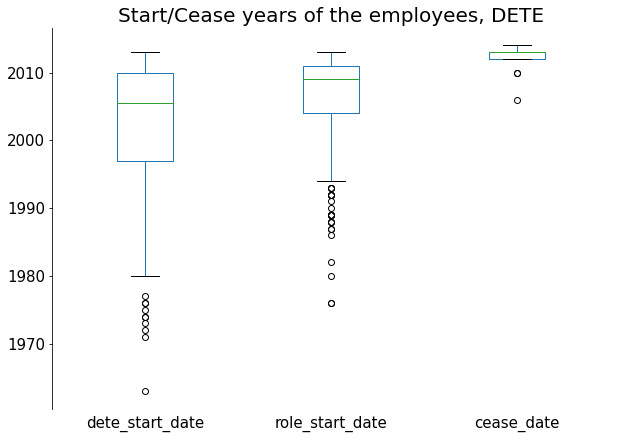

In [179]:
# Creating boxplots for the date columns of the DETE dataset
dete_resignations[['dete_start_date', 'role_start_date', 'cease_date']].plot(kind='box', 
                                                                             figsize=(10,7), 
                                                                             fontsize=15)
plt.title('Start/Cease years of the employees, DETE', fontsize=20)
plt.tick_params(bottom=False)
sns.despine(bottom=True)

Now everything makes sense: year ranges are coherent for all the 3 columns, some people changed their role in the institute after being assumed (were promoted, most probably), some others left the institute. In general, people started quitting relatively recently, the last 15 years, mostly after 2010.
### Calculating Institute Service
For answering one of our questions in interest, we need to know the years of service for each employee (the length of time an employee spent in a workplace). In the TAFE dataset, we have this information in the `institute_service` column. Let’s calculate the same column for the DETE dataset:

In [180]:
# Calculating the 'institute_service' column
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

Let's now  take a look at the `institute_service` column in both datasets:

In [181]:
dete_resignations['institute_service'].value_counts(dropna=False).sort_index(ascending=True)

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     7
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
NaN     38
Name: institute_service, dtype: int64

We can notice that 20 employees worked in the DETE institute for less than one year, 22 employees – 1 year. They are a target audience for our question: the employees who have only worked for the institute for a short period of time.

Also, there seems to be a high % of NaN values for this column:

In [182]:
round(dete_resignations['institute_service'].isnull().sum()*100/len(dete_resignations['institute_service']))

12

Let's take a look at the same column divided into equal groups of years, this time ignoring missing values:

In [310]:
print(f'\033[1mInstitute service length, DETE, %:\033[0m\n\n'
      f"{round(dete_resignations['institute_service'].value_counts(bins=5)*100/dete_resignations['institute_service'].value_counts().sum()).astype(int)}")

Institute service length, DETE, %:

(-0.05, 9.8]    61
(9.8, 19.6]     20
(19.6, 29.4]    12
(29.4, 39.2]     6
(39.2, 49.0]     1
Name: institute_service, dtype: int32


The majority of people worked in the DETE institute for less than 10 years. 

Let's now take a look at the TAFE institute's workers (ignoring missing values again):

In [184]:
print(f'\033[1mInstitute service length, TAFE, %:\033[0m\n\n'
      f"{round(tafe_resignations['institute_service'].value_counts()*100/tafe_resignations['institute_service'].value_counts().sum()).astype(int)}")

Institute service length, TAFE, %:

Less than 1 year      25
1-2                   22
3-4                   22
5-6                   11
11-20                  9
7-10                   7
More than 20 years     3
Name: institute_service, dtype: int32


In this column, the values are given in the year ranges. We see that 25% of the employees for whom the information about their years of service is available worked in the institute less than 1 year, 22% – 1-2 years. Hence, in the TAFE institute, more people resigned after a short period of time.
### Cleaning the Age Column
To answer our second question, we have to clean first the `age` column for both datasets.

In [185]:
dete_resignations['age'].value_counts(dropna=False).sort_index(ascending=True)

20 or younger     1
21-25            29
26-30            35
31-35            29
36-40            41
41-45            48
46-50            41
51-55            32
56-60            26
61 or older      23
NaN               5
Name: age, dtype: int64

In [186]:
tafe_resignations['age'].value_counts(dropna=False).sort_index(ascending=True)

20 or younger     9
21  25           33
26  30           32
31  35           32
36  40           32
41  45           45
46  50           39
51-55            39
56 or older      29
NaN              50
Name: age, dtype: int64

The age ranges are the same in both datasets, only that in the DETE dataset there are the ranges "56-60" and "61 or older", while in the TAFE dataset they are included in the range "56 or older". Since we're going to combine both datasets and analyze all the data together, we'll merge those 2 ranges also for the DETE dataset, to avoid bias:

In [187]:
# Combining the ranges "56-60" and "61 or older" for the DETE dataset
dete_resignations['age'] = dete_resignations['age'].str.replace('56-60', '56 or older')\
                                                   .str.replace('61 or older', '56 or older')

Another issue to be resolved is different formats of age ranges between the datasets. Let's standardize them following the example of the DETE dataset, i.e. 2 values divided by a hyphen:

In [188]:
tafe_resignations['age'] = tafe_resignations['age'].str.replace('  ', '-')

Now the `age` column is cleaned and standardized in both datasets.
### Identifying Dissatisfied Employees
Next, we'll identify any employees who resigned because they were dissatisfied. For this purpose, we'll use the columns from both datasets that contain reasons (the negative ones) for resigning. If the employee indicated any of them, we'll mark them as dissatisfied in a new column. For the DETE dataset, such columns are: `
- `job_dissatisfaction`,
- `dissatisfaction_with_the_department`,
- `physical_work_environment`,
- `lack_of_recognition`,
- `lack_of_job_security`,
- `work_location`, 
- `employment_conditions`,
- `work_life_balance`, 
- `workload`. 

For the TAFE dataset, they are:
- `Contributing Factors. Dissatisfaction`, 
- `Contributing Factors. Job Dissatisfaction`.

Let's take a look at the values of these columns:

In [189]:
dete_dissatisisfaction = ['job_dissatisfaction', 'dissatisfaction_with_the_department',
                          'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security',
                          'work_location', 'employment_conditions', 'work_life_balance', 'workload']

dete_resignations[dete_dissatisisfaction].dtypes

job_dissatisfaction                    bool
dissatisfaction_with_the_department    bool
physical_work_environment              bool
lack_of_recognition                    bool
lack_of_job_security                   bool
work_location                          bool
employment_conditions                  bool
work_life_balance                      bool
workload                               bool
dtype: object

For the DETE dataset, all these columns are boolean, so they don't need additional modifications for creating the `dissatisfied` column. 

Let's look now at the values of such columns in the TAFE dataset:

In [190]:
tafe_dissatisisfaction = ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']
tafe_resignations[tafe_dissatisisfaction].dtypes

Contributing Factors. Dissatisfaction        object
Contributing Factors. Job Dissatisfaction    object
dtype: object

Here the columns in interest are objects (strings), so they need first to be converted to boolean:

In [191]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [192]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

We see that "-" practically means `False` (satisfied), while the other string value – `True` (dissatisfied). Given that, let's update the column values:

In [193]:
def string_to_bool(val):
    if pd.isnull(val):
        return np.nan
    elif val=='-':
        return False
    return True

# Converting strings to boolean
tafe_resignations[tafe_dissatisisfaction] = tafe_resignations[tafe_dissatisisfaction].applymap(string_to_bool)

Now all the columns related to the dissatisfaction factors in both datasets are in boolean, and we can generalize this information in one column `dissatisfied`:

In [194]:
# Creating the 'dissatisfied' column in both datasets
dete_resignations['dissatisfied'] = dete_resignations[dete_dissatisisfaction].any(axis=1, skipna=False)
tafe_resignations['dissatisfied'] = tafe_resignations[tafe_dissatisisfaction].any(axis=1, skipna=False)

### Keeping Only Relevant Columns
After cleaning the data and gathering all the dissatisfaction factors in one column, we don't need anymore so many columns in each dataset to proceed with our analysis. Let's take a look once again at the column names and decide which of them to keep:

In [195]:
dete_resignations.columns

Index(['id', 'separation_type', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'institute_service',
       'dissatisfied'],
      dtype='object')

In [196]:
tafe_resignations.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separation_type',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service', 'dissatisfied'],
      dtype='object')

It seems that there are very few columns in each dataframe that represent any potential interest (at least as a reference) for further analysis. Let's create copies of the dataframes containing only those columns:

In [197]:
# Creating lists of columns to keep
defe_columns_to_keep = ['id', 'cease_date', 'position', 'region', 'employment_status', 'gender',
                        'age', 'institute_service', 'dissatisfied']
tafe_columns_to_keep = ['id', 'WorkArea', 'cease_date', 'gender', 'age', 'employment_status', 
                        'position', 'institute_service', 'dissatisfied']

# Copying dataframes only with the selected columns
dete_resignations_updated = dete_resignations[defe_columns_to_keep].copy()
tafe_resignations_updated = tafe_resignations[tafe_columns_to_keep].copy()

### Combining the Data
Now, we'll combine both datasets. Our goal is to aggregate the data according to the `institute_service` column for answering the first question and then according to the `age` column to answer the second one.

First, we'll add a column `institute` to each dataframe and then we'll combine both dataframes:

In [198]:
# Adding the 'institute' column
dete_resignations_updated['institute'] = 'DETE'
tafe_resignations_updated['institute'] = 'TAFE'

# Combining the dataframes
combined = pd.concat([dete_resignations_updated, tafe_resignations_updated])
combined.columns

Index(['id', 'cease_date', 'position', 'region', 'employment_status', 'gender',
       'age', 'institute_service', 'dissatisfied', 'institute', 'WorkArea'],
      dtype='object')

### Categorizing the Institute Service Column
Let's check the values of the `institute_service` column after combining the dataframes:

In [199]:
combined['institute_service'].unique()

array([7.0, 18.0, 3.0, 15.0, 14.0, 5.0, nan, 30.0, 32.0, 39.0, 17.0, 9.0,
       6.0, 1.0, 35.0, 38.0, 36.0, 19.0, 4.0, 26.0, 10.0, 8.0, 2.0, 0.0,
       23.0, 13.0, 16.0, 12.0, 21.0, 20.0, 24.0, 33.0, 22.0, 28.0, 49.0,
       11.0, 41.0, 27.0, 42.0, 25.0, 29.0, 34.0, 31.0, '3-4', '7-10',
       '1-2', 'Less than 1 year', '11-20', '5-6', 'More than 20 years'],
      dtype=object)

We see that this column currently contains values in different formats. To analyze the data, we'll categorize these values in a unique format according to the following definitions:

- *New:* Less than 3 years at a company.
- *Experienced:* 3-6 years.
- *Established:* 7-10 years.
- *Veteran:* 11 or more years.

We'll start by extracting the years of service from each value of the column:

In [200]:
# Converting each value to string, extracting the years, and then converting to float
combined['institute_service'] = combined['institute_service'].astype('str')\
                                                             .str.extract(r'(\d+)', expand=True)\
                                                             .astype('float')

# Checking the updated values
combined['institute_service'].unique()

array([ 7., 18.,  3., 15., 14.,  5., nan, 30., 32., 39., 17.,  9.,  6.,
        1., 35., 38., 36., 19.,  4., 26., 10.,  8.,  2.,  0., 23., 13.,
       16., 12., 21., 20., 24., 33., 22., 28., 49., 11., 41., 27., 42.,
       25., 29., 34., 31.])

Now, we'll map these years to the career stage categories:

In [201]:
def service_category(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return 'New'
    elif val <= 6:
        return 'Experienced'
    elif val <= 10:
        return 'Established'
    else:
        return 'Veteran'

# Mapping the years to the career stages
combined['service_cat'] = combined['institute_service'].apply(service_category)

# Checking the values
list(combined['service_cat'].unique())

['Established', 'Veteran', 'Experienced', nan, 'New']

### Categorizing the Age Column
Now we'll apply the same categorization process to the `age` column. First, let's check the values of this column:

In [202]:
combined['age'].unique()

array(['36-40', '41-45', '31-35', '46-50', '56 or older', '51-55',
       '21-25', '26-30', nan, '20 or younger'], dtype=object)

We can divide these values into the following 3 categories:

- *Junior:* 30 y.o. or younger.
- *Middle:* 31-45 y.o.
- *Senior:* 46 y.o. or older.

To do so, we have to extract the age from each value of the column:

In [203]:
# Converting each value to string, extracting the ages, and then converting to float
combined['age'] = combined['age'].str.extract(r'(\d+)', expand=True).astype('float')

# Checking the updated values
print(list(combined['age'].unique()))

[36.0, 41.0, 31.0, 46.0, 56.0, 51.0, 21.0, 26.0, nan, 20.0]


Now, we'll map these age values to the categories above:

In [204]:
def age_category(val):
    if pd.isnull(val):
        return np.nan
    elif val < 31:
        return 'Junior'
    elif val < 46:
        return 'Middle'
    else:
        return 'Senior'

# Mapping the age values to the age categories
combined['age_cat'] = combined['age'].apply(age_category)

# Checking the values
print(list(combined['age_cat'].unique()))

['Middle', 'Senior', 'Junior', nan]


### Dealing with Missing Values
Our next step is to check how many missing values there are in the combined dataset and how they can be handled:

In [205]:
print(f'\033[1mMissing values by column, %:\033[0m\n\n'
      f"{round(combined.isnull().sum()*100/len(combined)).astype(int)}")

Missing values by column, %:

id                    0
cease_date            2
position              8
region               59
employment_status     8
gender                9
age                   8
institute_service    14
dissatisfied          1
institute             0
WorkArea             48
service_cat          14
age_cat               8
dtype: int32


We see that almost in all the columns there are missing values:

- In the `WorkArea` and `region` columns, there are most of all missing values, because both of them were present only in one of the datasets (DETE or TAFE). We can delete these columns without any consequences for our analysis.
- In the `dissatisfied` column, which is the key data for our analysis, there is 1% of missing values. We'll probably have to fill them.
- In the `age_cat` and `service_cat` columns, which are the columns of our main interest, we have quite a high percentage of missing values (8 and 14% correspondingly). We have to take a closer look at them and decide how to cope with them.
- In the rest of the columns, we also have missing values, up to 9% for `gender`. However, since we kept these columns only as reference data and we're not going to use them directly for our analysis, we can keep them as they are.

First, we'll remove the unnecessary columns `WorkArea` and `region`:

In [206]:
combined = combined.drop(['WorkArea', 'region'], axis=1)

Now, we have to decide what to do with the `dissatisfied`  column. Let's look at its values:

In [207]:
print(f'\033[1mThe \'dissatisfied\' column values, %:\033[0m\n\n'
      f"{round(combined['dissatisfied'].value_counts(dropna=False)*100/len(combined['dissatisfied'])).astype(int)}")

The 'dissatisfied' column values, %:

False    62
True     37
NaN       1
Name: dissatisfied, dtype: int32


The `False` value definitely dominates this column. Hence, given that there is only 1% of missing values here, we can replace them with `False`:

In [208]:
combined['dissatisfied'] = combined['dissatisfied'].fillna(False)

Next, we have to handle missing values in the `service_cat` and `age_cat` columns (we'll ignore the original `institite_service` and `age` columns and leave them only as a reference). The approach will be to try to replace the missing values with the most frequent value of the column, or, alternatively, to figure it out of the other value if available (i.e. the service length from the age).

Let's take a look at the rows with the missing values  in the `service_cat` column:

In [209]:
combined[combined['service_cat'].isnull()]

,id,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat,age_cat
7,1.700000e+01,2012.0,Teacher Aide,Permanent Part-time,Male,56.0,NaN,True,DETE,NaN,Senior
17,4.000000e+01,2012.0,Teacher,Permanent Full-time,Female,21.0,NaN,True,DETE,NaN,Junior
37,1.070000e+02,2012.0,Teacher Aide,Temporary Part-time,Female,46.0,NaN,True,DETE,NaN,Senior
50,1.410000e+02,2012.0,Teacher Aide,Permanent Part-time,Female,51.0,NaN,False,DETE,NaN,Senior
62,1.970000e+02,2012.0,Teacher Aide,Permanent Part-time,Female,46.0,NaN,False,DETE,NaN,Senior
95,2.890000e+02,2013.0,Public Servant,Permanent Full-time,Female,26.0,NaN,True,DETE,NaN,Junior
96,2.920000e+02,2013.0,Teacher Aide,Permanent Part-time,Female,56.0,NaN,False,DETE,NaN,Senior
97,2.940000e+02,2012.0,Schools Officer,Permanent Part-time,NaN,56.0,NaN,False,DETE,NaN,Senior
101,3.020000e+02,2012.0,School Administrative Staff,Permanent Part-time,Female,46.0,NaN,False,DETE,NaN,Senior
117,3.440000e+02,2012.0,School Administrative Staff,Permanent Part-time,Female,41.0,NaN,False,DETE,NaN,Middle


We can notice that quite a lot of rows have neither institute service nor age values to help us guess one value from another. Filling them just with the most frequent value is not correct since we have too many missing values (14% for `service_cat` and 8% for `age_cat`). It seems that the best approach, in this case, is to drop these rows since they don't give any additional value for answering our questions:

In [210]:
# Dropping the rows with missing values for both institute service and age
combined = combined.drop(combined[(combined['service_cat'].isnull()) & (combined['age_cat'].isnull())].index)
combined = combined.reset_index(drop=True)

Now for each missing value of the `service_cat` column there's a value in the `age_cat` column, and vice versa. So we can fill the missing values of the `service_cat` column based on the `age_cat` column. However, there's one more factor to consider to avoid a bias while finding the most frequent value: the institute (DETE or TAFE). Both institutes have quite a different distribution of the career stages, as we can see below:

In [211]:
print(f'\033[1mDETE career stages, %:\033[0m\n\n'
      f"{round(combined[combined['institute']=='DETE']['service_cat'].value_counts(dropna=False)*100/combined[combined['institute']=='DETE']['service_cat'].value_counts().sum()).astype(int)}"
      f'\033[1m\n\nTAFE career stages, %:\033[0m\n\n'
      f"{round(combined[combined['institute']=='TAFE']['service_cat'].value_counts(dropna=False)*100/combined[combined['institute']=='DETE']['service_cat'].value_counts().sum()).astype(int)}")

DETE career stages, %:

Veteran        38
Experienced    28
New            19
Established    15
NaN            12
Name: service_cat, dtype: int32

TAFE career stages, %:

New            57
Experienced    41
Veteran        15
Established     9
Name: service_cat, dtype: int32


While in the DETE institute there are more "Veteran" employees, in the TAFE there are more "New". Hence, our next steps are the following:

- to find the most frequent value of the institute service for each combination "institute + age category" (e.g. DETE & "Middle"),
- to fill missing values of the `service_cat` column with the corresponding values.

In [212]:
# Creating a function to specify an "institute + age category" combination
def institute_age_cat(institute, age_cat):
    return (combined['institute']==institute) & (combined['age_cat']==age_cat)

# Specifying the combinations
dete_junior = institute_age_cat('DETE', 'Junior')
dete_middle = institute_age_cat('DETE', 'Middle')
dete_senior = institute_age_cat('DETE', 'Senior')
tafe_junior = institute_age_cat('TAFE', 'Junior')
tafe_middle = institute_age_cat('TAFE', 'Middle')
tafe_senior = institute_age_cat('TAFE', 'Senior')

combinations = [dete_junior, dete_middle, dete_senior, tafe_junior, tafe_middle, tafe_senior]
comb_titles = ['DETE+Junior', 'DETE+Middle', 'DETE+Senior', 
               'TAFE+Junior', 'TAFE+Middle', 'TAFE+Senior']

# Printing out the most frequent values of 'service_cat' for each combination
print('\033[1mThe most frequent values of \'service_cat\':\033[0m\n')
for i in range(len(combinations)):
    print(f"{comb_titles[i]}:\t{combined[combinations[i]]['service_cat'].value_counts(dropna=False).index[0]}")

The most frequent values of 'service_cat':

DETE+Junior:	Experienced
DETE+Middle:	Veteran
DETE+Senior:	Veteran
TAFE+Junior:	New
TAFE+Middle:	New
TAFE+Senior:	New


We'll use the resulting most frequent values to fill the missing values of the `service_cat` column:

In [213]:
# Filling the missing values of 'service_cat' with the corresponding most frequent values
combined.loc[dete_junior,'service_cat'] = combined.loc[dete_junior,'service_cat'].fillna('Experienced')
combined.loc[dete_middle,'service_cat'] = combined.loc[dete_middle,'service_cat'].fillna('Veteran')
combined.loc[dete_senior,'service_cat'] = combined.loc[dete_senior,'service_cat'].fillna('Veteran')
combined.loc[tafe_junior,'service_cat'] = combined.loc[tafe_junior,'service_cat'].fillna('New')
combined.loc[tafe_middle,'service_cat'] = combined.loc[tafe_middle,'service_cat'].fillna('New')
combined.loc[tafe_senior,'service_cat'] = combined.loc[tafe_senior,'service_cat'].fillna('New')
combined.reset_index(drop=True, inplace=True)

# Checking the results
print(combined['service_cat'].isnull().sum())

0


Hence, after our manipulations, no missing values left in the `service_cat` column. 

Let's now return to the `age_cat` column:

In [214]:
combined[combined['age_cat'].isnull()]

,id,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat,age_cat
71,286.0,2012.0,Cleaner,Permanent Full-time,Female,NaN,0.0,False,DETE,New,NaN


We see that there's only one missing value left (since we removed a lot of rows with both the `service_cat` and `age_cat` missing). We can fill it with the most frequent value of `age_cat` where the institute is the DETE and the career stage is "New":

In [215]:
# Specifying the conditions
dete_new = (combined['institute']=='DETE') & (combined['service_cat']=='New')

# Determining the most frequent value
combined[dete_new]['age_cat'].value_counts(dropna=False).index[0]

'Junior'

So we'll fill the missing value of the `age_cat` column with "Junior":

In [216]:
# Filling the missing value of 'service_cat' with "Junior"
combined.loc[dete_new,'age_cat'] = combined.loc[dete_new,'age_cat'].fillna('Junior')
combined.reset_index(drop=True, inplace=True)

# Checking the results
print(combined['age_cat'].isnull().sum())

0


Before proceeding with the data analysis, let's check the last time the missing values:

In [217]:
print(f'\033[1mMissing values by column:\033[0m\n\n{combined.isnull().sum().sort_values()}')

Missing values by column:

id                    0
dissatisfied          0
institute             0
service_cat           0
age_cat               0
age                   1
position              2
employment_status     2
gender                5
cease_date           11
institute_service    29
dtype: int64


We see that in our columns of interest (`dissatisfied`, `service_cat`, and `age_cat`), there're no missing values left.
## Data Analysis: Calculating the Percentage of Dissatisfied People 
### 1. By Career Stage
#### Overall trend
Having all the necessary data cleaned, let's calculate and visualize the percentage of dissatisfied employees who left the institute at different career stages:

+--------------+----+
| Career stage | %  |
+--------------+----+
| Established  | 53 |
|   Veteran    | 45 |
| Experienced  | 34 |
|     New      | 30 |
+--------------+----+


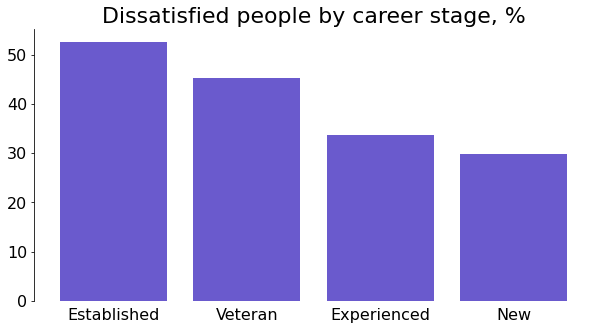

In [274]:
def create_pivot_table(df, column):
    return df.pivot_table('dissatisfied', column)['dissatisfied'].sort_values(ascending=False).mul(100)

def print_pivot_table(data, category):
    print(data.round().convert_dtypes().to_markdown(headers=[category, '%'], tablefmt='pretty'))

def create_bar_plt(data, category):
    plt.figure(figsize=(10,5))
    plt.bar(data.index, data.values, color='slateblue')
    plt.title(f'Dissatisfied people by {category}, %', fontsize=22)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.tick_params(bottom=False)
    sns.despine(bottom=True)
    plt.show()

dissatisfied_service = create_pivot_table(combined, 'service_cat')
print_pivot_table(dissatisfied_service, 'Career stage')
create_bar_plt(dissatisfied_service, 'career stage')

The results look counterintuitive: the employees who worked in the institute for a longer period are more likely to be dissatisfied when resigning (up to 53%) than those who worked for a shorter period (up to 30%). The highest percentage of dissatisfied people is related to the category "Established", (who worked 7-10 years), the lowest – to "New" (less than 3 years).
#### DETE vs. TAFE
Let's do the same steps separately for each institute and see if the trend is preserved and where in general there are more dissatisfied employees:

+--------------+----+
| Career stage | %  |
+--------------+----+
| Established  | 64 |
|   Veteran    | 51 |
| Experienced  | 45 |
|     New      | 39 |
+--------------+----+


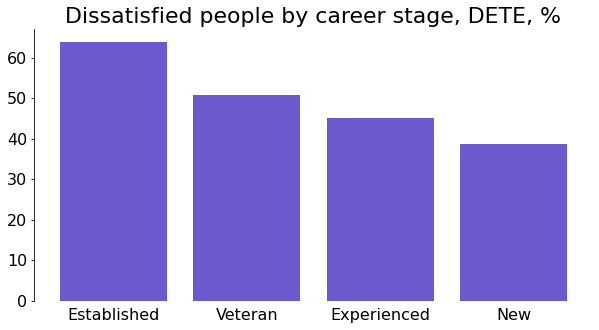




+--------------+----+
| Career stage | %  |
+--------------+----+
| Established  | 33 |
|   Veteran    | 28 |
|     New      | 27 |
| Experienced  | 25 |
+--------------+----+


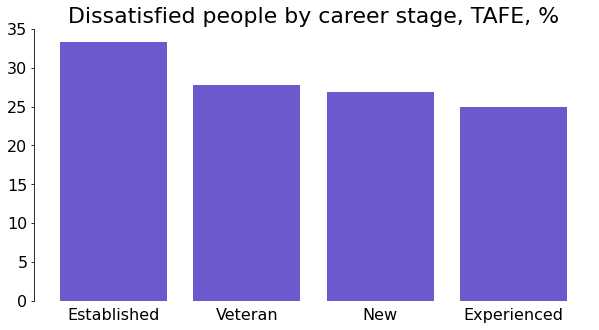

In [282]:
# Selecting data for the DETE institute
dete_service = combined[combined['institute']=='DETE'].reset_index(drop=True)

dissatisfied_service_dete = create_pivot_table(dete_service, 'service_cat')
print_pivot_table(dissatisfied_service_dete , 'Career stage')
create_bar_plt(dissatisfied_service_dete, 'career stage, DETE')
print(2*'\n')

# Selecting data for the TAFE institute
tafe_service = combined[combined['institute']=='TAFE'].reset_index(drop=True)

dissatisfied_service_tafe = create_pivot_table(tafe_service, 'service_cat')
print_pivot_table(dissatisfied_service_tafe , 'Career stage')
create_bar_plt(dissatisfied_service_tafe, 'career stage, TAFE')

We can clearly see almost the same trend for each institute as the overall one (only with "New" and "Experienced" changed places for the TAFE institute). However, another evident thing here is that in the DETE institute, the percentage of dissatisfied people is almost twice higher for each category (up to 64%) than for the same categories in the TAFE institute. If we look at the overall percentage of the dissatisfied employees from both istitutes, probably we'll find an explanation:

In [297]:
print(f'\033[1mPeople left DETE because of dissatisfaction, %:\033[0m\n\n'
      f"{round(combined[combined['institute']=='DETE']['dissatisfied'].value_counts()*100/sum(combined[combined['institute']=='DETE']['dissatisfied'].value_counts())).convert_dtypes()}"
      f'\033[1m\n\n\nPeople left TAFE because of dissatisfaction, %:\033[0m\n\n'
      f"{round(combined[combined['institute']=='TAFE']['dissatisfied'].value_counts()*100/sum(combined[combined['institute']=='TAFE']['dissatisfied'].value_counts())).convert_dtypes()}")

People left DETE because of dissatisfaction, %:

False    51
True     49
Name: dissatisfied, dtype: Int64


People left TAFE because of dissatisfaction, %:

False    73
True     27
Name: dissatisfied, dtype: Int64


Hence, in general, 49% of all the employees who left the DETE institute did so because of some dissatisfaction issues, while for the TAFE institute, the percentage is 27%.
### 2. By Age
#### Overall trend
Now, we'll do the same analysis for the `age_cat` column:

+--------------+----+
| Age category | %  |
+--------------+----+
|    Senior    | 40 |
|    Middle    | 36 |
|    Junior    | 36 |
+--------------+----+


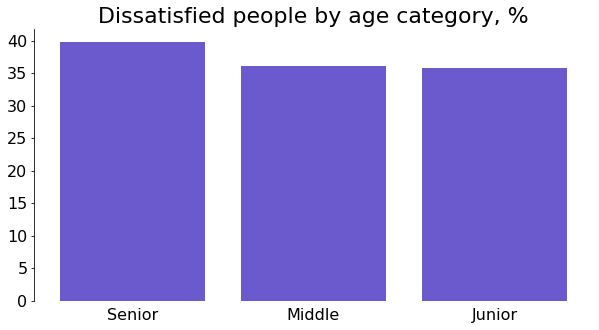

In [284]:
dissatisfied_age = create_pivot_table(combined, 'age_cat')
print_pivot_table(dissatisfied_age , 'Age category')
create_bar_plt(dissatisfied_age, 'age category')

We can observe that age has a bit less influence on being or not dissatisfied when resigning (only 4% of the difference between the categories). However, the general trend here is that older employees are more likely to be dissatisfied than their younger colleagues.
#### DETE vs. TAFE
Let's have a closer look at the age trends of each institute separately:

+--------------+----+
| Age category | %  |
+--------------+----+
|    Senior    | 52 |
|    Middle    | 47 |
|    Junior    | 46 |
+--------------+----+


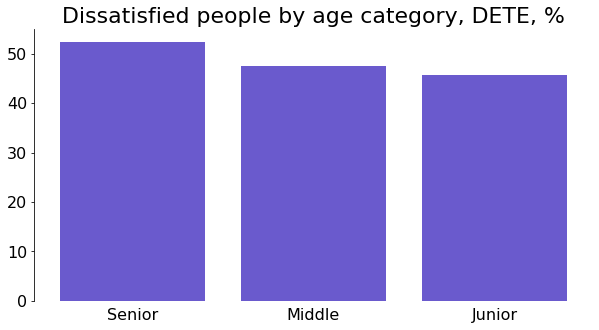




+--------------+----+
| Age category | %  |
+--------------+----+
|    Junior    | 28 |
|    Senior    | 27 |
|    Middle    | 26 |
+--------------+----+


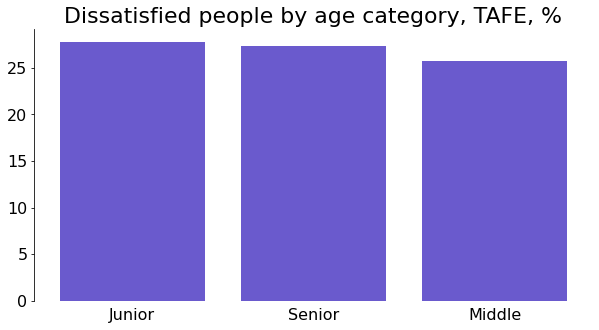

In [286]:
# Selecting data for the DETE institute
dete_age = combined[combined['institute']=='DETE'].reset_index(drop=True)

dissatisfied_age_dete = create_pivot_table(dete_age, 'age_cat')
print_pivot_table(dissatisfied_age_dete , 'Age category')
create_bar_plt(dissatisfied_age_dete, 'age category, DETE')
print(2*'\n')

# Selecting data for the TAFE institute
tafe_age = combined[combined['institute']=='TAFE'].reset_index(drop=True)

dissatisfied_age_tafe = create_pivot_table(tafe_age, 'age_cat')
print_pivot_table(dissatisfied_age_tafe , 'Age category')
create_bar_plt(dissatisfied_age_tafe, 'age category, TAFE')

We see that the overall trend is strongly influenced by the DETE institute data, where once again we have almost twice more dissatisfied people for each category of age than in the TAFE institute. For the latter, the trend is different: Junior-Senior-Middle, with an insignificant difference between these categories up to 2%.
## Conclusion
In this project, we've cleaned the employee exit surveys from two Australian institutes and analyzed the data from the standpoint of relations between resigning from the company because of some kind of dissatisfaction and the age or the length of service. As a result, we can conclude the following:
- The employees who worked in the institute for a longer period are more likely to resign due to dissatisfaction issues (up to 53%) than those who worked for a shorter period (up to 30%).
- The older employees are more likely to resign due to dissatisfaction issues than their younger colleagues, even though the difference between the categories here is only up 4%.
- The percentage of dissatisfied employees from the DETE institute is twice higher than from the TAFE. This tendency can also be traced in percentages for different categories.